In [16]:
# How does Social Perception of Mental Health affect Utilization Rate? 

In [17]:
# Dependencies/CSV Path
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

mh_data_path = ('Resources/mental-heath-in-tech-2016_20161114.csv')

complete_mh_data = pd.read_csv(mh_data_path)

# Columns needed for analysis
clean_mh_data = complete_mh_data.iloc[:, [4,16,47,40,41]]

clean_mh_data.head()

,Does your employer provide mental health benefits as part of healthcare coverage?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you currently have a mental health disorder?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
0,Not eligible for coverage / N/A,NaN,No,Maybe,"No, I don't think they would"
1,No,NaN,Yes,"No, I don't think it would","No, I don't think they would"
2,No,NaN,No,Maybe,Maybe
3,NaN,1.0,Yes,"Yes, I think it would",Maybe
4,Yes,NaN,Yes,"Yes, I think it would",Maybe


In [18]:
# Add necessary columns to convert Q1 and Q2 to "No", "Maybe", "Yes" responses only

pd.set_option('mode.chained_assignment', None)
clean_mh_data.columns.values[1] = "Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?"
clean_mh_data["Q1 Values"]= ''
clean_mh_data["Q2 Values"]= ''

#clean_mh_data.head()
mh_data = clean_mh_data[["Does your employer provide mental health benefits as part of healthcare coverage?",
                         "Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?",
                         "Do you currently have a mental health disorder?", 
                         "Do you feel that being identified as a person with a mental health issue would hurt your career?", 
                         "Q1 Values", "Do you think that team members/co-workers would view you more "
                         "negatively if they knew you suffered from a mental health issue?", "Q2 Values"]]
mh_data.head()

,Does your employer provide mental health benefits as part of healthcare coverage?,"Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?",Do you currently have a mental health disorder?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Q1 Values,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Q2 Values
0,Not eligible for coverage / N/A,NaN,No,Maybe,,"No, I don't think they would",
1,No,NaN,Yes,"No, I don't think it would",,"No, I don't think they would",
2,No,NaN,No,Maybe,,Maybe,
3,NaN,1.0,Yes,"Yes, I think it would",,Maybe,
4,Yes,NaN,Yes,"Yes, I think it would",,Maybe,


In [19]:
# Convert responses to "No", "Maybe", "Yes" for Q1 
mh_data.loc[(mh_data["Do you feel that being identified as a "
            "person with a mental health issue would hurt your career?"]==
             "No, I don't think it would"), "Q1 Values"]="No"

mh_data.loc[(mh_data["Do you feel that being identified as a "
            "person with a mental health issue would hurt your career?"]==
             "No, it has not"), "Q1 Values"]="No"

mh_data.loc[(mh_data["Do you feel that being identified as a "
            "person with a mental health issue would hurt your career?"]==
             "Maybe"), "Q1 Values"]="Maybe"

mh_data.loc[(mh_data["Do you feel that being identified as a "
            "person with a mental health issue would hurt your career?"]==
             "Yes, I think it would"), "Q1 Values"]="Yes"

mh_data.loc[(mh_data["Do you feel that being identified as a "
            "person with a mental health issue would hurt your career?"]==
             "Yes, it has"), "Q1 Values"]="Yes"

In [20]:
# Convert responses to "No", "Maybe", "Yes" for Q2
mh_data.loc[(mh_data["Do you think that team members/co-workers "
            "would view you more negatively if they knew you suffered "
            "from a mental health issue?"]== "No, I don't think they would"), "Q2 Values"]="No"

mh_data.loc[(mh_data["Do you think that team members/co-workers "
            "would view you more negatively if they knew you suffered "
            "from a mental health issue?"]== "No, they do not"), "Q2 Values"]="No"

mh_data.loc[(mh_data["Do you think that team members/co-workers "
            "would view you more negatively if they knew you suffered "
            "from a mental health issue?"]== "Maybe"), "Q2 Values"]="Maybe"

mh_data.loc[(mh_data["Do you think that team members/co-workers "
            "would view you more negatively if they knew you suffered "
            "from a mental health issue?"]== "Yes, I think they would"), "Q2 Values"]="Yes"

mh_data.loc[(mh_data["Do you think that team members/co-workers "
            "would view you more negatively if they knew you suffered "
            "from a mental health issue?"]== "Yes, they do"), "Q2 Values"]="Yes"

mh_data.head()

,Does your employer provide mental health benefits as part of healthcare coverage?,"Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?",Do you currently have a mental health disorder?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Q1 Values,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Q2 Values
0,Not eligible for coverage / N/A,NaN,No,Maybe,Maybe,"No, I don't think they would",No
1,No,NaN,Yes,"No, I don't think it would",No,"No, I don't think they would",No
2,No,NaN,No,Maybe,Maybe,Maybe,Maybe
3,NaN,1.0,Yes,"Yes, I think it would",Yes,Maybe,Maybe
4,Yes,NaN,Yes,"Yes, I think it would",Yes,Maybe,Maybe


In [21]:
#Get total of "No, Maybe, Yes" responses for both questions for non-self employed workers and self employed workers
non_se_util = mh_data.loc[(mh_data["Does your employer provide mental health benefits as part of healthcare coverage?"] =="Yes") & (mh_data["Do you currently have a mental health disorder?"]=="Yes"),["Q1 Values", "Q2 Values"]]
non_se_util.iloc[:,1].value_counts()

non_se_not_util = mh_data.loc[(mh_data["Does your employer provide mental health benefits as part of healthcare coverage?"] =="Yes") & (mh_data["Do you currently have a mental health disorder?"]=="No"),["Q1 Values", "Q2 Values"]]
non_se_not_util.iloc[:,1].value_counts()

se_util = mh_data.loc[(mh_data["Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?"] ==1.0) & (mh_data["Do you currently have a mental health disorder?"]=="Yes"),["Q1 Values", "Q2 Values"]]
se_util.iloc[:,1].value_counts()

se_not_util = mh_data.loc[(mh_data["Do you have medical coverage, private insurance or state-provided, which includes treatment of mental health issues?"] ==1.0) & (mh_data["Do you currently have a mental health disorder?"]=="No"),["Q1 Values", "Q2 Values"]]
se_not_util.iloc[:,1].value_counts()

Maybe    28
No       15
Yes      13
Name: Q2 Values, dtype: int64

In [22]:
#Get values in No, Maybe, Yes order

q1_non_se_util = list(non_se_util.iloc[:,0].value_counts())
q1_non_se_util.sort()

q2_non_se_util = list(non_se_util.iloc[:, 1].value_counts())
item1 = 81
q2_non_se_util.remove(item1)
q2_non_se_util.insert(0, item1)

q1_non_se_not_util = list(non_se_not_util.iloc[:,0].value_counts())
item2 = 27
q1_non_se_not_util.remove(item2)
q1_non_se_not_util.insert(0, item2)

q2_non_se_not_util = list(non_se_not_util.iloc[:,1].value_counts())
item3 = 53
q2_non_se_not_util.remove(item3)
q2_non_se_not_util.insert(0, item3)
q2_non_se_not_util

q1_se_util = list(se_util.iloc[:,0].value_counts())
q1_se_util.sort()

q2_se_util = list(se_util.iloc[:,1].value_counts())
q2_se_util.sort()

q1_se_not_util = list(se_not_util.iloc[:,0].value_counts())
item4 = 7 
q1_se_not_util.remove(item4)
q1_se_not_util.insert(0, item4)
q1_se_not_util

q2_se_not_util = list(se_not_util.iloc[:,1].value_counts())
item5 = 15 
q2_se_not_util.remove(item5)
q2_se_not_util.insert(0, item5)

In [23]:
#Dataframe for responses to both questions (people utilizing mhr)

responses= ["No", "Maybe", "Yes"]

utilizing = pd.DataFrame({"Response": responses,
                         "NON SE UTIL Q1": q1_non_se_util,
                         "NON SE UTIL Q2": q2_non_se_util,
                         "SE UTIL Q1": q1_se_util,
                         "SE UTIL Q2": q2_se_util})
utilizing

,Response,NON SE UTIL Q1,NON SE UTIL Q2,SE UTIL Q1,SE UTIL Q2
0,No,47,81,7,18
1,Maybe,97,103,31,34
2,Yes,114,74,48,34


In [24]:
#Each question makes up the 60.5% (Utilize)
q1_util_no = 54 #15.7%
q1_util_maybe = 128 #37.2%
q1_util_yes = 162 #47.1%

q2_util_no = 99 #28.8%
q2_util_maybe = 137 #39.8%
q2_util_yes = 108 #31.4%

In [25]:
#Dataframe for responses to both questions (people not utilizing mhr)

not_utilizing = pd.DataFrame({"Response": responses,
                             "NON SE NOT UTIL Q1": q1_non_se_not_util,
                             "NON SE NOT UTIL Q2": q2_non_se_not_util,
                             "SE NOT UTIL Q1": q1_se_not_util,
                             "SE NOT UTIL Q2": q2_se_not_util})
not_utilizing

,Response,NON SE NOT UTIL Q1,NON SE NOT UTIL Q2,SE NOT UTIL Q1,SE NOT UTIL Q2
0,No,27,53,7,15
1,Maybe,72,76,28,28
2,Yes,70,40,21,13


In [26]:
#Each question makes up the 39.5% (Not Utilize)
q1_not_util_no = 79 #35.1%
q1_not_util_maybe = 98 #43.6%
q1_not_util_yes = 48 #21.3%

q2_not_util_no = 68 #30.2%
q2_not_util_maybe = 104 #46.2%
q2_not_util_yes = 53 #23.6%

<Figure size 600x600 with 0 Axes>

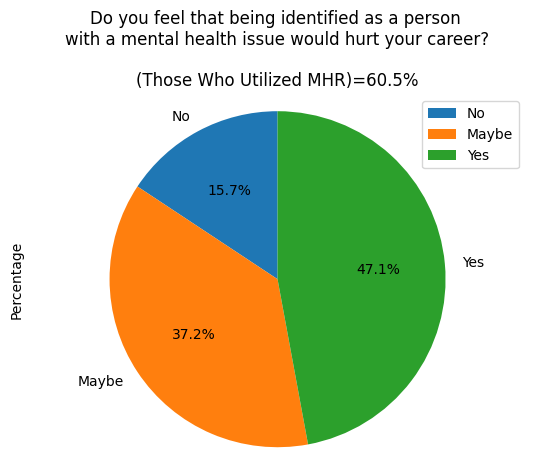

In [27]:
#Pie Chart for Question 1 (People who utilized MHR)

q1_60 = {'Category': ['No', 'Maybe', 'Yes'],
        'Percentage': [q1_util_no, q1_util_maybe, q1_util_yes]}

df = pd.DataFrame(q1_60)



plt.figure(figsize=(6, 6))
df['Percentage'] = df['Percentage'].astype(float) 
df.plot(kind='pie', y='Percentage', labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Do you feel that being identified as a person \nwith a mental health issue would hurt your career?\n\n(Those Who Utilized MHR)=60.5%')
plt.axis('equal')

plt.show()

<Figure size 600x600 with 0 Axes>

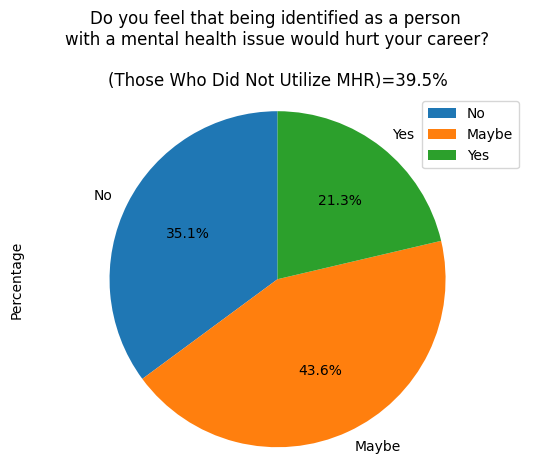

In [28]:
#Pie Chart for Question 1 (People who did not utilize MHR)

q1_60 = {'Category': ['No', 'Maybe', 'Yes'],
        'Percentage': [q1_not_util_no, q1_not_util_maybe, q1_not_util_yes]}

df = pd.DataFrame(q1_60)



plt.figure(figsize=(6, 6))
df['Percentage'] = df['Percentage'].astype(float) 
df.plot(kind='pie', y='Percentage', labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Do you feel that being identified as a person \nwith a mental health issue would hurt your career?\n\n(Those Who Did Not Utilize MHR)=39.5%')
plt.axis('equal')

plt.show()

<Figure size 600x600 with 0 Axes>

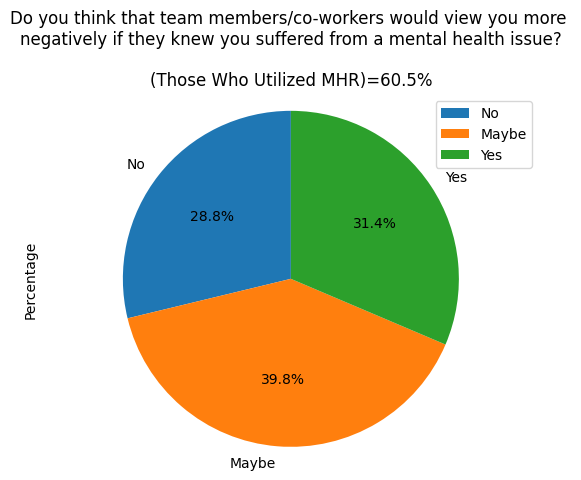

In [29]:
#Pie Chart for Question 2 (People who utilized MHR)


q1_60 = {'Category': ['No', 'Maybe', 'Yes'],
        'Percentage': [q2_util_no, q2_util_maybe, q2_util_yes]}

df = pd.DataFrame(q1_60)



plt.figure(figsize=(6, 6))
df['Percentage'] = df['Percentage'].astype(float) 
df.plot(kind='pie', y='Percentage', labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Do you think that team members/co-workers would view you more \nnegatively if they knew you suffered from a mental health issue?\n\n(Those Who Utilized MHR)=60.5%')
plt.axis('equal')

plt.show()

<Figure size 600x600 with 0 Axes>

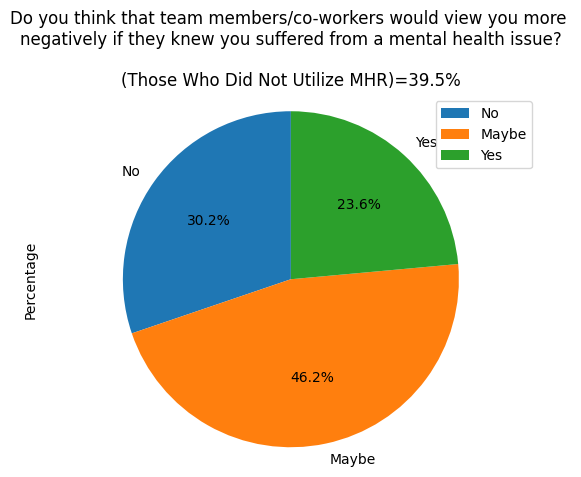

In [30]:
#Pie Chart for Question 2 (People who did not utilize MHR)


q1_60 = {'Category': ['No', 'Maybe', 'Yes'],
        'Percentage': [q2_not_util_no, q2_not_util_maybe, q2_not_util_yes]}

df = pd.DataFrame(q1_60)



plt.figure(figsize=(6, 6))
df['Percentage'] = df['Percentage'].astype(float) 
df.plot(kind='pie', y='Percentage', labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Do you think that team members/co-workers would view you more \nnegatively if they knew you suffered from a mental health issue?\n\n(Those Who Did Not Utilize MHR)=39.5%')
plt.axis('equal')

plt.show()